<a href="https://colab.research.google.com/github/hijera/NN_colab_hw/blob/main/%D0%94%D0%BE%D0%BC%D0%B0%D1%88%D0%BD%D0%B5%D0%B5_%D0%B7%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_%D0%BA_%D0%B7%D0%B0%D0%BD%D1%8F%D1%82%D0%B8%D1%8E_%C2%AB%D0%98%D0%B7%D0%B2%D0%BB%D0%B5%D1%87%D0%B5%D0%BD%D0%B8%D0%B5_%D0%B8%D0%BD%D1%84%D0%BE%D1%80%D0%BC%D0%B0%D1%86%D0%B8%D0%B8%C2%BB_(%D0%92%D0%BB%D0%B0%D1%81%D0%BE%D0%B2_%D0%90%D0%BD%D1%82%D0%BE%D0%BD).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Цель: получить навыки решения классических задач NLP
### Задание 1: составить словари для классификации по тональности.
Данные для задания — отзывы на банки, собранные с нескольких сайтов рунета. Отзывы могут быть как положительными
— оценка 5, так и отрицательными — оценка 1.
1. Разбейте всю коллекцию отзывов на предложения. Лемматизируйте все слова. Обучите по коллекции предложений word2vec
2. Приведите несколько удачных и неудачных примеров решения стандартных текстов для word2vec:
3. Постройте несколько визуализаций:
 - тест на определение ближайших слов
 - тест на аналогии (мужчина — король : женщина — королева)
 - TSNE для топ-100 или топ-500 слов и найдите осмысленные кластеры слов
 - тест на определение лишнего слова
 - задайте координаты для нового пространства следующим образом: одна ось описывает отношение «плохо — хорошо», вторая — «медленно — быстро», и найдите координаты названий банков в этих координатах
### Задание 2: распространить метку.
1. Определите 5–8 позитивных слов (например, быстрый, удобный) и 5–8 негативных слов (например, очередь, медленно). Эти слова будут основной будущего оценочного словаря
2. Пусть позитивному классу соответствует метка 1, негативному — -1
3.  Пометьте выбранные слова в лексическом графе соответствующими метками
4. Запустите любой известный вам метод распространения метки (Label Propogation) в лексическом графе
5. На выходе метода распространения ошибки должны быть новые слова, помеченные метками 1 и -1 — это и есть искомые оценочные слова

In [ ]:
vector_size=150
w2v_epochs=10
ml_epochs=15

In [ ]:
!pip install pymorphy2
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
%matplotlib inline
df = pd.read_json("banki_responses.json", lines=True)


vector_size=60
w2v_epochs=10
ml_epochs=10
# Print DataFrame



df['grade']=df['rating_grade'].apply(lambda x: 1 if float(x)>2.5 else 0)
df.head()

Defaulting to user installation because normal site-packages is not writeable


,city,rating_not_checked,title,num_comments,bank_license,author,bank_name,datetime,text,rating_grade,grade
0,г. Воронеж,True,Ипотека на 5+,0,лицензия № 1623,e.novikova,ВТБ 24,2015-06-08 11:06:56,Здравствуйте! Хотелось бы выразить благодарно...,5.0,1
1,г. Казань,True,ЗВОНКИ СОСЕДЯМ,0,лицензия № 2289,KZN\Vorontsova_NA,Русский Стандарт,2015-06-06 18:17:52,Уважаемые представители департамента по работе...,2.0,0
2,г. Санкт-Петербург,True,Ложная информация!!!!,0,лицензия № 2307,Evgenia15,Союз,2015-06-07 19:08:33,Здравствуйте. Столкнулась с такой ситуацией. в...,2.0,0
3,г. Москва,True,Банкомат не зачислил деньги на счет,1,лицензия № 2557,dolgov.work,Ситибанк,2015-06-07 19:22:00,1 июня 2015 в Москве в отделении по адресу Смо...,1.0,0
4,г. Волгоград,True,Невозможно закрыть карту 2(два)!!!,0,лицензия № 3354,copLine,Ренессанс Кредит,2015-06-08 14:54:55,История очень долгая! Пришел я в банк (это раз...,1.0,0


In [ ]:
df['bank_name'].unique()

array(['ВТБ 24', 'Русский Стандарт', 'Союз', 'Ситибанк',
       'Ренессанс Кредит', 'Бинбанк', 'Сбербанк России', 'Кубань Кредит',
       'БыстроБанк', 'Восточный Экспресс Банк', 'Райффайзенбанк',
       'Московский Кредитный Банк', 'Тинькофф Банк', 'Авангард', 'Зенит',
       'Бенифит-Банк', 'Росбанк', 'Связной Банк', 'ОТП Банк',
       'Хоум Кредит Банк', 'Уралсиб', 'Гагаринский', 'Ланта-Банк',
       'Московский Областной Банк', 'Сетелем Банк', 'Альфа-Банк',
       'БИНБАНК кредитные карты', 'БКС — Инвестиционный Банк', 'МТС Банк',
       'Дом-Банк', 'Петербургский Социальный Коммерческий Банк',
       'МАСТ-Банк', 'Совкомбанк', 'Россельхозбанк', 'Банк Москвы',
       'Банк «МБА-Москва»', 'Лето Банк', 'Банкирский Дом',
       'Уральский Финансовый Дом', 'Российский Кредит', 'Веста',
       'Киви Банк', 'Национальный Банк «Траст»', 'Югра', 'МДМ Банк',
       'Промсвязьбанк', 'ЮниКредит Банк', 'Яндекс.Деньги',
       'Уральский Банк Реконструкции и Развития', 'Инвестторгбанк',
       

In [ ]:
cache_text={}
cache_lemm_text={}
cache_lemms={}

In [ ]:
import nltk.data
from tqdm import tqdm
tokenizer = nltk.data.load('tokenizers/punkt/russian.pickle')
from string import punctuation
iterator=0
data=[]
grade=[]
!pip install pymystem3
import pymorphy2
morph = pymorphy2.MorphAnalyzer()
from pymystem3 import Mystem
m = Mystem()
from nltk.corpus import stopwords
i2=0
nltk.download('stopwords')
import re
regex = re.compile("[А-Яа-я]+")

custom_rep=['``','\'\'', '...','(',')','«','»','т.е.','пл.']
noise = stopwords.words('russian') + list(punctuation) + custom_rep

def replace_words(text):
    for rep in custom_rep:
        text=text.replace(rep,' ')
    for rep in list(punctuation):
        text=text.replace(rep,' ')
    text=re.sub("\s+"," ",text)
    return text

def lemmatize_pm2(text):
    try:
        words = text.split() # разбиваем текст на слова
        res = list()

        for word in words:

            if word not in noise:
                if (word in cache_lemms):
                    p=cache_lemms[word]
                else:
                    p = morph.parse(word)[0]
                    cache_lemms[word]=p
                res.append(p.normal_form)

        return " ".join(res).strip()
    except:
        return " "

def lemmatize(text, mystem=m):
    try:
        return " ".join(m.lemmatize(text)).strip()
    except:
        return " "

for item in tqdm(df.iterrows()):

    tokens=tokenizer.tokenize(item[1]['text'])
    if (float(item[1]['rating_grade'])>=2.5):
        positive=1
    else:
        positive=0

    for token in tokens:

        token=replace_words(token.lower())
#        if (i2 in cache_lemm_text):
#            token=lemmatize_pm2(token.lower())
#            token=cache_lemm_text[i2]
#        else:
#            token=lemmatize_pm2(token.lower())
#            cache_lemm_text[i2]=token
        token=lemmatize_pm2(token)

        if (i2<10):
            print(token)
        data.append(token)
        grade.append(positive)
        i2+=1
    iterator+=1


new_df = pd.DataFrame({'text':data,'grade':grade})
#
#    item.split
new_df.head()

Defaulting to user installation because normal site-packages is not writeable


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Антон\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
25it [00:00, 69.60it/s]

здравствуйте
хотеться выразить благодарность банк втб24 г воронеж ленин непосредственно специалист ипотечный кредитование мещеряков юлия анатолиевич
это второй ипотека банк специалист
вопрос подача документ быстрый принятие решение одобрение весь необходимый сумма никакой проблема выдача кредит
удобно никуда нужно ходить сторонний организация нужно договариваться
оценка сотрудник банк приехать вовремя страховка оформить выдача кредит отделение банк
быстро чётко слаженно
мой вопрос сравнение условие юлия подробно отвечать сомнение никакой возникнуть какой именно банк брать выбор сбербанк втб24
дополнительный расход выдача кредит страховка являться обязательный условие оформление ипотека
также оформить карта привилегия бесплатно


201030it [03:25, 976.92it/s] 


,text,grade
0,здравствуйте,1
1,хотеться выразить благодарность банк втб24 г в...,1
2,это второй ипотека банк специалист,1
3,вопрос подача документ быстрый принятие решени...,1
4,удобно никуда нужно ходить сторонний организац...,1


In [ ]:
new_df['text'][45]

'2012 год взять ипотека банк союз санкт петербургский филиал'

In [ ]:
#Обучаем word2vec и эмбеддинги
from nltk.tokenize import word_tokenize
from gensim.models.word2vec import Word2Vec
from gensim.utils import effective_n_jobs
effective_n_jobs(16)
from gensim.models.callbacks import CallbackAny2Vec

class MonitorCallback(CallbackAny2Vec):
    def __init__(self, test_words):
        self._test_words = test_words
    def on_train_begin(self,model):
        print("Train begin")
    def on_epoch_end(self, model):
        print("Model loss:", model.get_latest_training_loss())  # print loss
        for word in self._test_words:  # show wv logic changes
            print(model.wv.most_similar(word))

#model.build_vocab(sentences, update=False)
sentences = [word_tokenize(text.lower()) for text in tqdm(new_df.text)]
%time model = Word2Vec(sentences=sentences, workers=8,  min_count=3, window=5,vector_size=vector_size,epochs=w2v_epochs)



100%|█████████████████████████████████████████████████████████████████████| 3036929/3036929 [03:21<00:00, 15089.33it/s]


CPU times: total: 5min 13s
Wall time: 1min 22s


In [ ]:
model.init_sims()
warnings.filterwarnings('ignore')

import numpy as np
def get_text_embedding(text,fsize=300):
    result = []
    text=replace_words(text)
    text=lemmatize_pm2(text)
    for word in word_tokenize(text.lower()):
        if word in model.wv:
            result.append(model.wv[word])

    if len(result):
        result = np.sum(result, axis=0)
    else:
        result = np.zeros(fsize)
    return result

#new_df = pd.DataFrame({'text':data,'grade':grade})


In [ ]:
features = [get_text_embedding(text,vector_size) for text in tqdm(df.text)]

100%|█████████████████████████████████████████████████████████████████████████| 201030/201030 [03:59<00:00, 837.70it/s]


In [ ]:
features[0]

array([ -49.681934  ,  -26.02088   ,   62.682846  ,    5.2014966 ,
         -4.1813955 ,   11.823044  ,   28.53501   ,  148.80688   ,
        -44.3951    ,   52.796833  ,  -76.858116  ,   11.856573  ,
       -103.471085  ,  123.349014  ,   19.874306  ,  -74.704796  ,
         -8.982006  ,   67.59136   ,   -2.2786267 ,  -66.27979   ,
        -15.151762  ,  -31.869007  ,  126.06172   ,  113.06932   ,
        -62.782463  ,   23.921104  ,   -0.85229856,  -47.78557   ,
        -41.407444  , -131.26953   ,  -73.54501   ,  161.67746   ,
        -62.70292   ,  -11.701351  ,  -27.391249  ,   64.75229   ,
         11.801409  ,   40.528355  ,  -90.77275   ,  -42.948265  ,
        -66.39473   ,  -30.923431  ,  -16.395245  ,   59.9326    ,
         -8.773668  ,   97.730675  ,  -89.12333   ,  -90.48711   ,
        101.25772   ,  -12.404398  ,  106.46865   ,   21.316671  ,
         67.21467   ,   29.837774  ,   26.785152  ,   28.75247   ,
        -12.446427  ,   54.407555  ,   32.164486  ,   88.66967

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, df.grade, test_size=0.33)

In [ ]:
from sklearn.linear_model import RidgeCV,LinearRegression
from sklearn import tree
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
#models = SVC(max_iter=500,
#        random_state=33,
#        verbose=True,)
models = AdaBoostClassifier(n_estimators=128, algorithm="SAMME",)
%time models.fit(X_train, y_train)
predicted = models.predict(X_test)
print(classification_report(y_test, predicted))

CPU times: total: 2min 28s
Wall time: 2min 30s
              precision    recall  f1-score   support

           0       0.88      0.96      0.92     51846
           1       0.78      0.54      0.64     14494

    accuracy                           0.87     66340
   macro avg       0.83      0.75      0.78     66340
weighted avg       0.86      0.87      0.86     66340



In [ ]:
print(df['text'][1])
print('grade:'+str(df['grade'][1]))
print(df['text'][100])
print('grade:'+str(df['grade'][100]))
print(df['text'][6100])
print('grade:'+str(df['grade'][6100]))

Уважаемые представители департамента по работе с просроченной задолженностью банка "Русский Стандарт"!  Я являюсь клиентом вашего банка, имею потребительский кредит. Да, признаю, что  платежи вношу невовремя, но до сегодняшнего дня они внесены. Сейчас есть также просроченный платеж за май, период просрочки- 1 месяц. Причина- смена работы, все сведения о работе я обязательно в банк сообщу. Сегодня половину платежа я внесла, вторую внесу через 5 дней. Проблема в следующем:  Ваши сотрудники обзванивают моих соседей, кого именно не знаю, но  видела записку вчера,  воткнутую в дверь моей квартиры, с просьбой позвонить Андрею Николаевичу. Я ранее уже с ним беседовала, и объясняла ситуацию по оплате.  Зачем звонить соседям, когда можно связаться с самим клиентом. Сейчас трудная ситуация с моим телефоном, он в ремонте, и я могу разговаривать после 18.00 с домашнего. Я не думаю, что сотрудникам так трудно позвонить клиенту после 18.00. В моем договоре , в пункте" Способ обмена между кредитором 

In [ ]:
#Пример удачных решений
c=models.predict([features[1]])
print(c)
c=models.predict([features[100]])
print(c)
#Пример неудачного решения.
c=models.predict([features[6100]])
print(c)

[0]
[0]
[0]


In [ ]:
#Предсказания word 2 vec
#Удачные
print(model.predict_output_word(['информация'],topn = 3) )
print(model.predict_output_word(['удача','банк'],topn = 3) )
#Неудачные
print(model.predict_output_word(['попросить'],topn = 3) )

[('конфиденциальный', 0.38704565), ('недостоверный', 0.36801225), ('достоверный', 0.21083122)]
[('процветание', 0.0031204424), ('удача', 0.0012342572), ('пожелать', 0.0005349381)]
[('настоятельно', 0.09689979), ('подождать', 0.029123658), ('прощение', 0.026607651)]


In [ ]:
#Тест на опредлеение ближайших слов

model.wv.index_to_key[:10]

['банк',
 'карта',
 'это',
 'деньга',
 'день',
 'кредит',
 'мой',
 'который',
 'счёт',
 'клиент']

In [ ]:
model.wv.most_similar('банк')

[('ситибанк', 0.6609032154083252),
 ('бм', 0.6240465044975281),
 ('мкб', 0.6151870489120483),
 ('росбанк', 0.6132805943489075),
 ('брс', 0.6079511046409607),
 ('аба', 0.6055018901824951),
 ('сбербанк', 0.5973646640777588),
 ('хкб', 0.5889384150505066),
 ('райффайзенбанк', 0.5741418600082397),
 ('альф', 0.5539094805717468)]

In [ ]:
model.wv.most_similar('клиент')

[('вкладчик', 0.7351517677307129),
 ('клиенто', 0.6677631735801697),
 ('клиентура', 0.6123557686805725),
 ('кардхолдер', 0.5870227217674255),
 ('заёмщик', 0.5712049007415771),
 ('пользователь', 0.5603193044662476),
 ('клиентов…', 0.5442902445793152),
 ('отталкивать', 0.5359511375427246),
 ('потенциальный', 0.5314549207687378),
 ('пассивный', 0.5298494696617126)]

In [ ]:
#Тест на аналогии

model.wv.most_similar(positive=['кредит', 'вклад'], negative=['счет'])

[('ипотека', 0.633929967880249),
 ('автокредит', 0.6296749114990234),
 ('депозит', 0.6193941235542297),
 ('досрочно', 0.5629822015762329),
 ('кк', 0.5495221614837646),
 ('кредитка', 0.5244848132133484),
 ('потребкредит', 0.5197853446006775),
 ('пай', 0.5085195302963257),
 ('первоначально', 0.48876622319221497),
 ('процентов…', 0.48534825444221497)]

In [ ]:
model.wv.most_similar(positive=['клиент', 'сотрудник'], negative=['работник'])

[('вкладчик', 0.612183153629303),
 ('заёмщик', 0.5584678649902344),
 ('человек', 0.5249566435813904),
 ('потенциальный', 0.5040561556816101),
 ('задолжник', 0.5029414296150208),
 ('клиенто', 0.49971625208854675),
 ('пользователь', 0.49906596541404724),
 ('клиентка', 0.49163007736206055),
 ('должник', 0.47882917523384094),
 ('уважительный', 0.47630545496940613)]

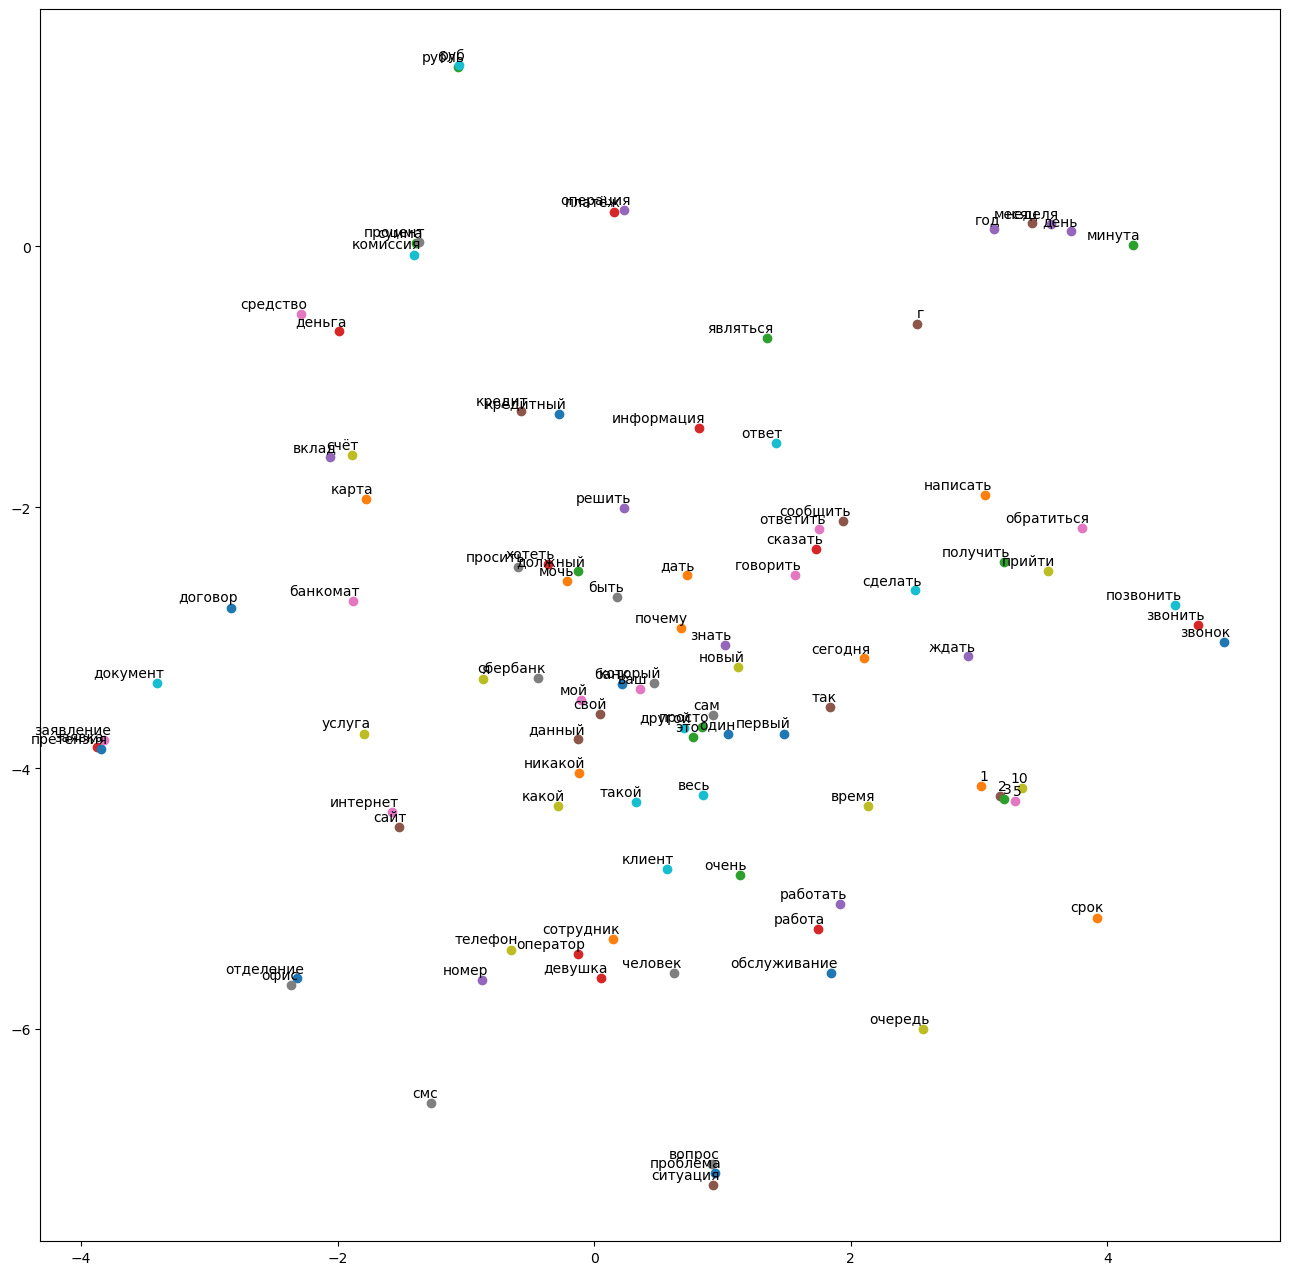

In [ ]:
from sklearn.manifold import TSNE

def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []
    items=100
    for word in model.wv.index_to_key:
        if items>0:
            tokens.append(model.wv[word])
            labels.append(word)
            items-=1

    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(np.array(tokens))

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])

    plt.figure(figsize=(16, 16))
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

tsne_plot(model)

Как мы видим, у нас есть осмысленные кластеры слов - это и слова, обозначающие промежуток времени (день, месяц, минута, неделя, год), и кластер "ситуация/проблема/вопрос", и кластер, описывающий звонок телефона (звонок/звонить/позвонили)

In [ ]:
#тест на определение лишнего слова
model.wv.doesnt_match(['получить','прийти','банкомат','написать','обратиться'])

'банкомат'

In [ ]:
#задайте координаты для нового пространства следующим образом: одна ось описывает отношение "плохо – хорошо",
#вторая – "медленно – быстро" и найдите координаты названий банков в этих координатах.
#Более формально: берем вектор слова "хорошо", вычитаем из него вектор слова "плохо",
#получаем новый вектор, который описывает разницу между хорошими и плохими словами.
#Берем вектор слова "сбербанк" и умножаем его на этот новый вектор – получаем координату по первой оси.
#Аналогично – для второй оси. Две координаты уже можно нарисовать на плоскости.

#Рисуем точки банков в координатах "плохо-хорошо/медленно-быстро"
v1=model.wv['хорошо']-model.wv['плохо']
v2=model.wv['быстро']-model.wv['медленно']
banks=['втб','сбербанк']
X=[]
Y=[]
labels_x=[]
ubanks=df['bank_name'].unique()
def low(x):
    return x.lower()

#plt.figure(figsize=(16, 16))
low_v=np.vectorize(low)
for bank in low_v(ubanks):
    if bank in model.wv:
        x=model.wv[bank]*v1
        y=model.wv[bank]*v2
        X.append(x)
        Y.append(y)
        labels_x.append(bank)


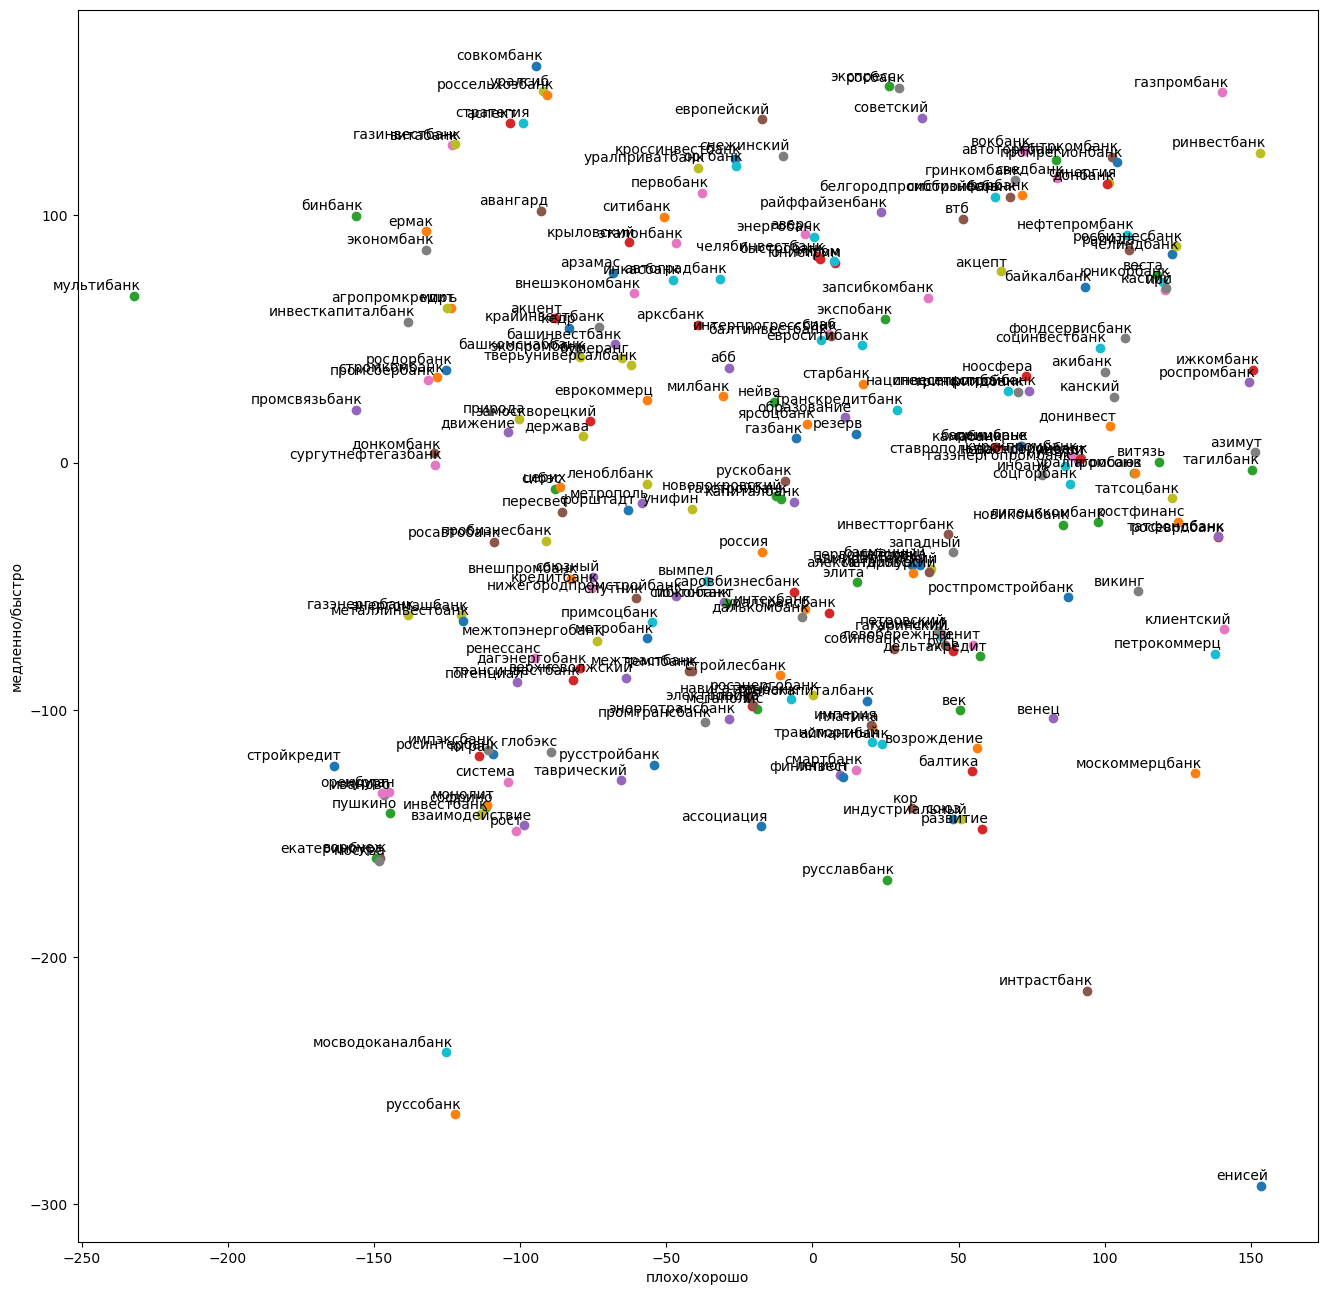

In [ ]:
tsne_model_x = TSNE(perplexity=1, n_components=1, init='pca', n_iter=2500, random_state=23)
new_X = tsne_model_x.fit_transform(np.array(X))
new_Y = tsne_model_x.fit_transform(np.array(Y))

plt.figure(figsize=(16, 16))
for i in range(len(new_X)):
     plt.scatter(new_X[i],new_Y[i])
     plt.xlabel('плохо/хорошо')
     plt.ylabel('медленно/быстро')
     plt.annotate(labels_x[i],
                 xy=(new_X[i], new_Y[i]),
                 xytext=(5, 2),
                 textcoords='offset points',
                 ha='right',
                 va='bottom')
plt.show()


In [ ]:
cword=len(model.wv.key_to_index)
cword

61562

## Распространение метки

In [ ]:
positive=['быстрый','удобный','современный','новый','приятный']
negative=['медленный','очередь','унылый','душный','грязь']
kernel=positive+negative
pos=1
neg=0
unlab=-1
y_kernel={'быстрый':pos,'удобный':pos,'современный':pos,'приятный':pos,'новый':pos,'медленный':neg,'очередь':neg,'унылый':neg,'душный':neg,'грязь':neg,'очередь':neg}

wdict={}
ldict={}
idict={}
def labeling(key):
    if (key in positive):
        return [pos]
    elif (key in negative):
        return [neg]
    else:
        return [unlab]

df_lp=pd.DataFrame(np.zeros((cword,60)))
df_lp_labels=pd.DataFrame(np.zeros((cword)))
df_lp_indexes=pd.DataFrame(np.zeros((cword)))
df_words=pd.DataFrame(np.zeros((cword)))
for idx, key in enumerate(model.wv.index_to_key):
#    wdict[key] = model.wv[key]
#    ldict[key]= labeling(key)
#    idict[key] = idx
    df_lp.loc[idx]=model.wv[key]
    df_lp_labels.loc[idx]=labeling(key)
    df_words.loc[idx]=[key]
    # Or my_dict[key] = model.wv.get_vector(key)
    # Or my_dict[key] = model.wv.word_vec(key, use_norm=False)


df_lp.head()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,0.568375,-1.840664,0.146232,1.007325,-2.361156,1.283805,-2.764968,1.358865,0.322862,-1.270925,...,-0.773448,0.587487,0.162680,-1.585264,-0.878332,1.021027,-1.064365,0.890796,1.180532,2.472106
1,-2.692787,-3.857519,0.519337,3.404028,-0.322460,1.978239,-1.448870,1.866093,-2.058757,-0.814017,...,1.926190,4.472449,0.653378,-3.023663,2.197626,2.165876,1.317398,2.397946,-1.307515,3.142238
2,0.559180,-0.165691,0.952736,-0.244022,2.119462,-1.955122,2.192808,-0.217103,-1.785282,-0.140838,...,-0.664556,-1.502157,0.338006,1.366993,-2.659725,1.508436,-0.995944,2.178866,-1.028475,2.121022
3,-9.158728,-2.828726,1.373281,2.401036,-3.694207,-1.635268,1.761774,-1.396824,-0.174200,0.352914,...,0.104725,0.815401,1.676344,-5.041809,-0.536927,2.168524,2.143854,-2.278168,-2.110023,-1.289734
4,1.542490,-0.345750,1.622909,2.166511,3.165683,-0.897159,-0.383783,-6.899661,2.068446,-1.612993,...,-2.031823,3.949627,0.968773,-5.442334,4.929853,-0.860993,3.386782,-4.830718,-1.446031,6.064978


In [ ]:
df_lp_labels[0].unique()

array([-1.,  0.,  1.])

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn import datasets
from sklearn.semi_supervised import LabelPropagation, LabelSpreading
from sklearn.utils import shuffle
from sklearn.metrics.pairwise import pairwise_kernels, rbf_kernel
!pip install igraph
from sklearn.preprocessing import OneHotEncoder
import igraph as ig

Defaulting to user installation because normal site-packages is not writeable


In [ ]:
#Ищем номера слов в словаре
index=0
w_keys=[]
w_words=[]
for w in model.wv.index_to_key:
    if w in kernel:
        w_keys.append(index)
        w_words.append(w)
    index+=1
print(w_keys)
tgt_arr=np.zeros(len(model.wv.index_to_key))
i=0
for key in w_keys:
    tgt_arr[key]=y_kernel[w_words[i]]
    i+=1

[78, 88, 497, 663, 706, 2307, 3739, 4502, 5368, 8698]


In [ ]:

label_spread = LabelSpreading(kernel='rbf', alpha=0.5, n_jobs=4,max_iter=20)
label_spread.fit(df_lp, df_lp_labels)

predicted_lp_labels = label_spread.transduction_
preds = label_spread.predict(df_lp)
np.mean(preds == df_lp_labels[0])


0.00016243786751567527

In [ ]:
label_spread.transduction_[700:1000]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [ ]:
print(classification_report(predicted_lp_labels,df_lp_labels))

              precision    recall  f1-score   support

        -1.0       0.00      0.00      0.00         0
         0.0       1.00      0.00      0.00     61557
         1.0       1.00      1.00      1.00         5

    accuracy                           0.00     61562
   macro avg       0.67      0.33      0.33     61562
weighted avg       1.00      0.00      0.00     61562



In [ ]:
def proc_label(item):
    if (item==neg):
        return unlab
    return item
#меняем 0 обратно на -1
predicted_lp_labels=[proc_label(item) for item in predicted_lp_labels]

In [ ]:
df_total=df_words
df_total['labels']=predicted_lp_labels
df_total['labels'].unique()

array([-1.,  1.])

In [ ]:
df_total.head(10000)

,0,labels
0,банк,-1.0
1,карта,-1.0
2,это,-1.0
3,деньга,-1.0
4,день,-1.0
...,...,...
9995,посметь,-1.0
9996,мкр,-1.0
9997,безболезненно,-1.0
9998,соединяться,-1.0


In [ ]:
df_total.loc[df_total['labels'] == unlab]

,0,labels
0,банк,-1.0
1,карта,-1.0
2,это,-1.0
3,деньга,-1.0
4,день,-1.0
...,...,...
61557,арсентиевич,-1.0
61558,338827,-1.0
61559,кроиловый,-1.0
61560,прескверный,-1.0


In [ ]:
df_total.loc[df_total['labels'] == pos]

,0,labels
88,новый,1.0
497,удобный,1.0
663,быстрый,1.0
706,приятный,1.0
2307,современный,1.0
